<a href="https://colab.research.google.com/github/lauraemmanuella/DataScience/blob/main/5_Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://seaborn.pydata.org/tutorial.html

http://seaborn.pydata.org/examples/index.html

In [2]:
#Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_tips = sns.load_dataset('tips')

In [ ]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
df_tips.describe(include='category') 

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


## Função relplot()

Método de alto nível para visualização de relações estatísticas entre variáveis. O default faz um gráfico de dispersão, mas permite fazer uma função contínua usando kind = line, normalmente usado quando queremos ver uma variável em função do tempo

relplot tem os argumentos col, row, hue, style e size que permitem gerar gráficos para até 6 subgrupos

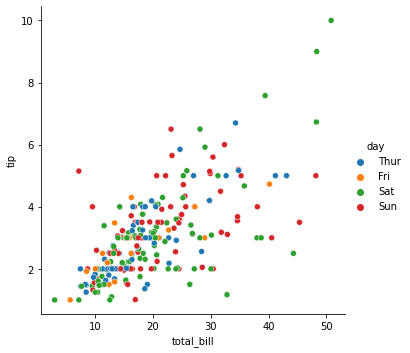

In [ ]:
#Gorjetas (tip) em função da conta (total_bill), colorindo por dia
sns.relplot(data=df_tips, x='total_bill', y='tip', hue='day') #kind= scatter é o default

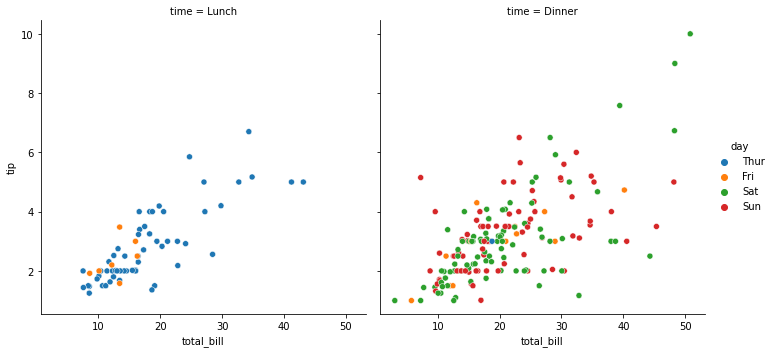

In [ ]:
sns.relplot(data=df_tips, x='total_bill', y='tip', hue='day', col = 'time')

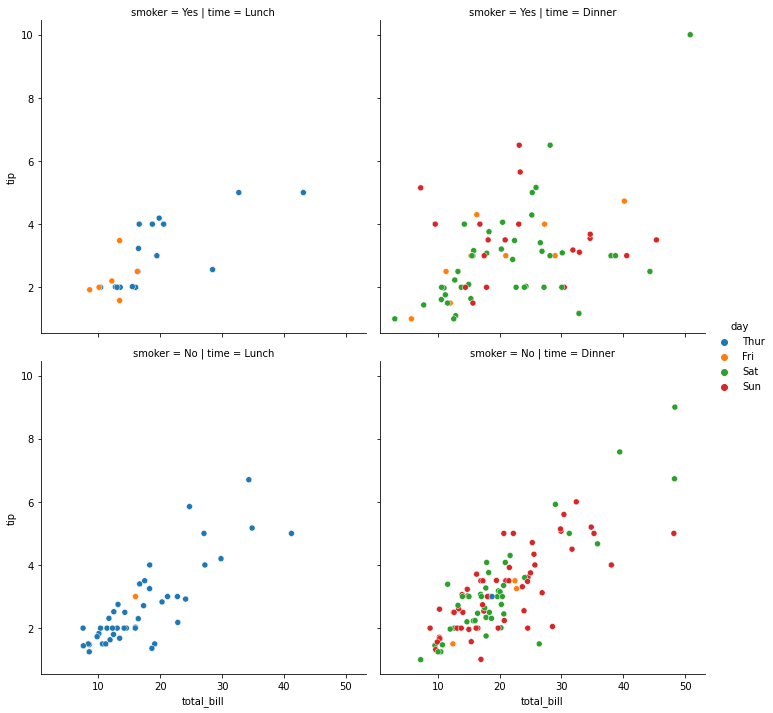

In [ ]:
sns.relplot(data=df_tips, x='total_bill', y='tip', hue='day', col = 'time', row = 'smoker')

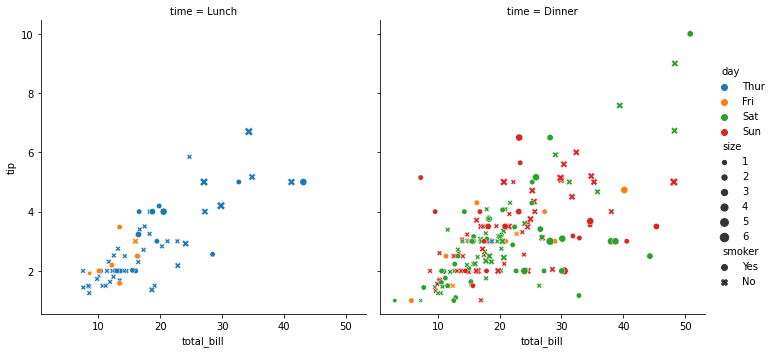

In [21]:
sns.relplot(data = df_tips, x='total_bill', y='tip', 
            hue='day', style = 'smoker', col='time', size = 'size') #style permite criar mais grupos
#mas, tenha cuidado para não ficar confuso

Enquanto nos gráficos de dispersão, cada ponto é uma observação independente, no gráfico de linhas temos uma variável plotada junto com alguma variável contínua, normalmente um período de tempo.

SB adiciona automaticamente um intervalo de confiança, que é a área sombreada ao redor da linha se houver várias observações para um único ponto

In [ ]:
df_flights = sns.load_dataset('flights')

In [ ]:
df_flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


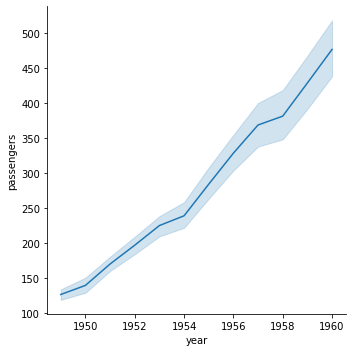

In [ ]:
#Quantidade de passageiros em função do ano
sns.relplot(data=df_flights, x='year', y='passengers', kind='line') #kind = line

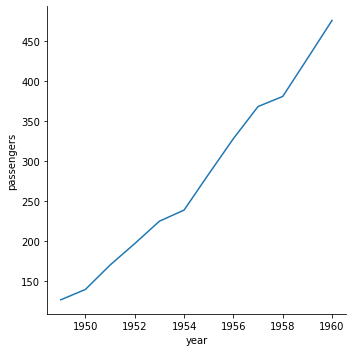

In [ ]:
#Pode retirar o intervalo de confiança
sns.relplot(data=df_flights, x='year', y='passengers', kind='line', ci = None) #kind = line

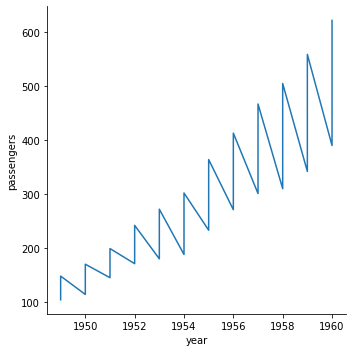

In [ ]:
sns.relplot(data=df_flights, x='year', y='passengers', kind='line', estimator = None) 
#Se estimator = None, mostra todas as observações (o padrão seria agregar e mostrar o CI)

### Plotando dados categóricos

O distplot tem os argumentos col, row e hue, permitindo dividir os dados em mais grupos 

http://seaborn.pydata.org/examples/faceted_histogram.html

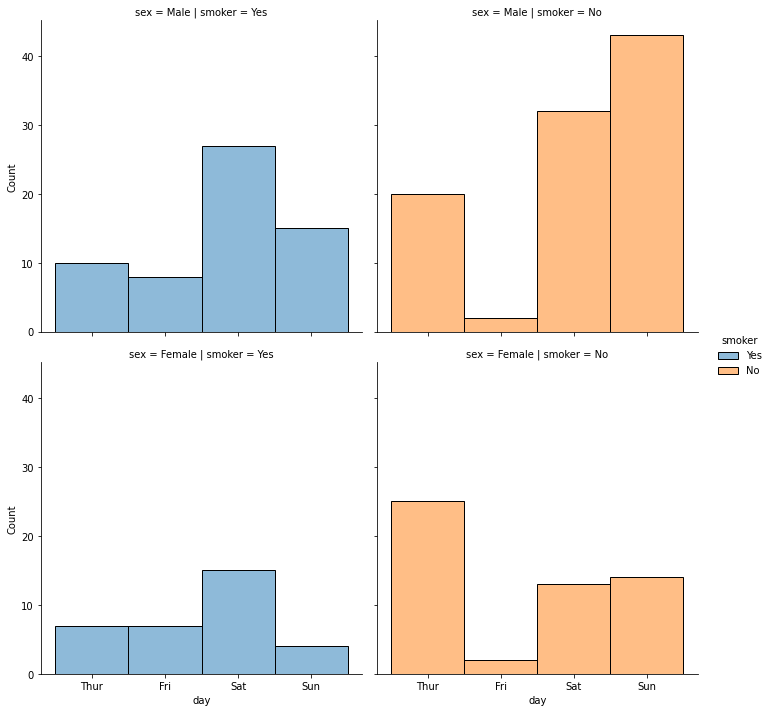

In [26]:
sns.displot(data=df_tips, x='day', hue='smoker', col='smoker', row = 'sex')

Vários tipos de gráficos especializados em seaborn são orientados para a visualização de dados categóricos. Eles podem ser acessados ​​através do catplot(). Esses gráficos oferecem diferentes níveis de granularidade. No nível mais fino, você pode querer ver cada observação desenhando um gráfico de “enxame”: um gráfico de dispersão que ajusta as posições dos pontos ao longo do eixo categórico para que eles não se sobreponham

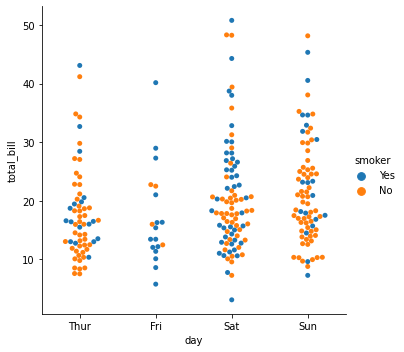

In [27]:
sns.catplot(data=df_tips, kind='swarm', x='day', y='total_bill', hue='smoker')

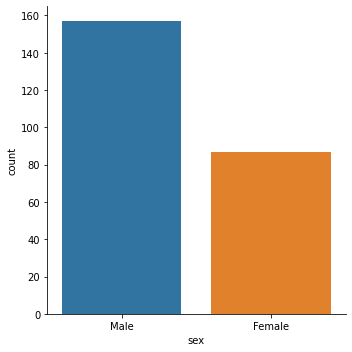

In [30]:
sns.catplot(data=df_tips, x='sex', kind='count'); #se colocar os dados no eixo x, mostra na vertical

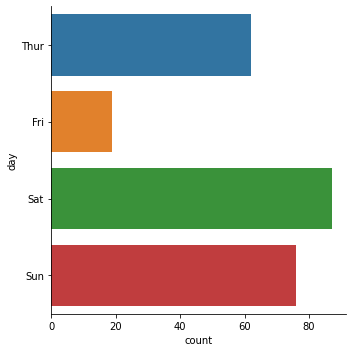

In [ ]:
sns.catplot(data=df_tips, y='day', kind='count'); #se colocar os dados no eixo y, mostra na horizontal

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lauraemmanuella/DataScience/main/BaseAlunos.csv')

In [6]:
df

,Matrícula,Nome,Unid. 1,Unid. 2,Unid. 3,Rec.,Resultado,Faltas,Sit.
0,2020001,ANA SILVA,10.0,4.0,2.0,8.00,7.3,7.0,APR
1,2020002,BRUNO SOUZA,7.0,1.0,4.0,4.00,5.0,1.0,APR
2,2020003,CARLA OLIVEIRA,7.0,0.0,2.0,3.00,4.0,11.0,REP
3,2020004,DAVID ANDRADE,3.0,0.0,5.0,4.00,4.0,17.0,REP
4,2020005,EVELIN MATIAS,8.0,10.0,2.0,4.00,7.3,11.0,APR
5,2020006,FRANCISCO JOSÉ,3.0,8.0,6.0,-,5.7,17.0,APRN
6,2020007,GABRIEL SOARES,10.0,6.0,6.0,-,7.3,0.0,APR
7,2020008,HEITOR NEVES,3.0,10.0,9.0,-,7.3,15.0,APR
8,2020009,INGRID DA SILVA,0.0,5.0,2.0,0.00,2.3,20.0,REMF
9,2020010,JOSÉ MARIA SANTOS,9.0,2.0,0.0,2.00,4.3,17.0,REP


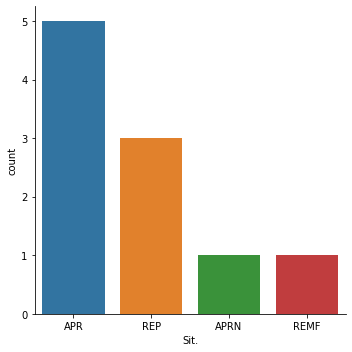

In [15]:
sns.catplot(data=df, x='Sit.', kind = 'count') #kind = line

Lembre que você pode passar os dados filtrados para gerar visualizações específicas

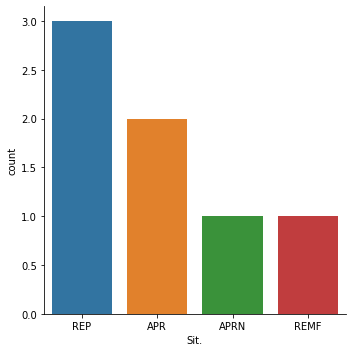

In [18]:
sns.catplot(data=df[df['Faltas'] >= 10], x='Sit.', kind = 'count') #kind = line